In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mortality.csv')

In [3]:
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [4]:
df.describe

<bound method NDFrame.describe of       group      ID  outcome  age  gendera        BMI  hypertensive  \
0         1  125047      0.0   72        1  37.588179             0   
1         1  139812      0.0   75        2        NaN             0   
2         1  109787      0.0   83        2  26.572634             0   
3         1  130587      0.0   43        2  83.264629             0   
4         1  138290      0.0   75        2  31.824842             1   
...     ...     ...      ...  ...      ...        ...           ...   
1172      2  171130      0.0   62        1  25.516870             1   
1173      2  101659      0.0   78        1  25.822710             0   
1174      2  162069      0.0   85        2  23.891779             1   
1175      2  120967      0.0   79        2  35.288554             0   
1176      2  107636      0.0   47        1  23.121384             1   

      atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                      0               0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [6]:
df.shape

(1177, 51)

In [7]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [8]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values = np.nan, strategy='mean')

In [9]:
float_col = df.select_dtypes(include=['float64']).columns

In [10]:
si.fit(df[float_col])

SimpleImputer()

In [11]:
df[float_col] = si.transform(df[float_col])

In [12]:
X = df.drop(columns='outcome')
y = df[['outcome']]

In [13]:
si = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [14]:
si.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')

In [17]:
df_final = X.copy()
df_final['outcome'] = y

In [18]:
df_final.isnull().sum()

group                       0
ID                          0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR       

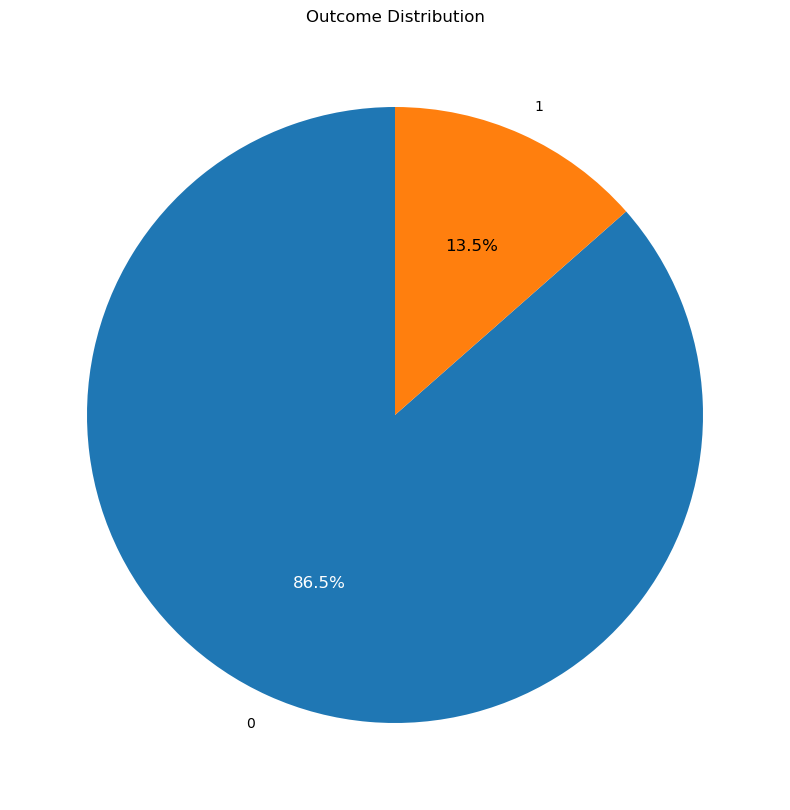

In [19]:
fig,ax = plt.subplots(figsize=(10, 10))

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), labels=['0', '1'], autopct='%1.1f%%', startangle=90)

plt.setp(autotexts, size=12, color='white')
autotexts[1].set_color('black')

plt.title('Outcome Distribution')
plt.show()

In [20]:
import plotly.express as px
fig = px.histogram(df_final, x="age", color="outcome", marginal="box", hover_data=df_final.columns)
fig.show()

In [21]:
fig = px.histogram(df_final, x="BMI", color="outcome", marginal="box", hover_data=df_final.columns)
fig.show()

In [22]:
fig = px.histogram(df_final, x="SP O2", color="outcome", marginal="box", hover_data=df_final.columns)
fig.show()

In [23]:
fig = px.histogram(df_final, x="heart rate", color="outcome", marginal="box", hover_data=df_final.columns)
fig.show()

In [24]:
df_final['gendera'].value_counts()

gendera
2    618
1    559
Name: count, dtype: int64

In [26]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [27]:
corr = df_final[col].corr()

<Axes: >

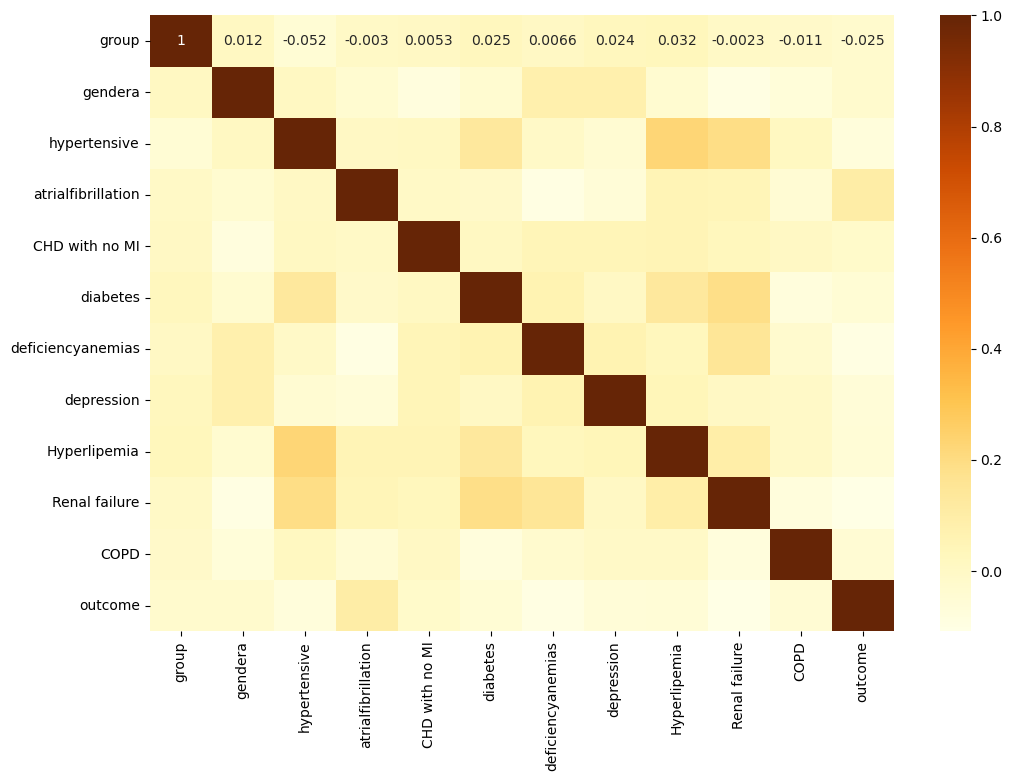

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

<Axes: ylabel='Density'>

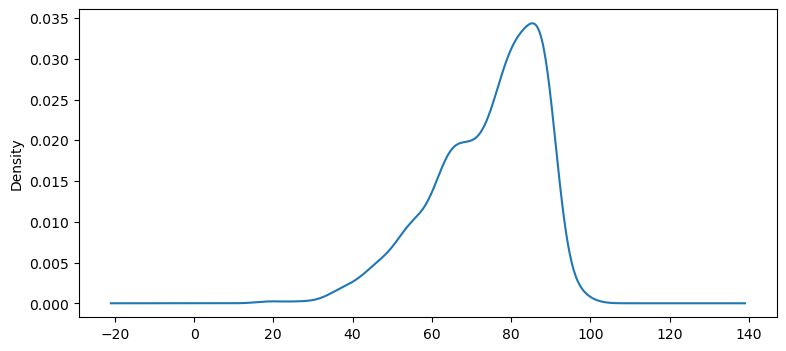

In [29]:
plt.figure(figsize=(9,4))
df_final['age'].plot(kind='kde')

<Axes: ylabel='Density'>

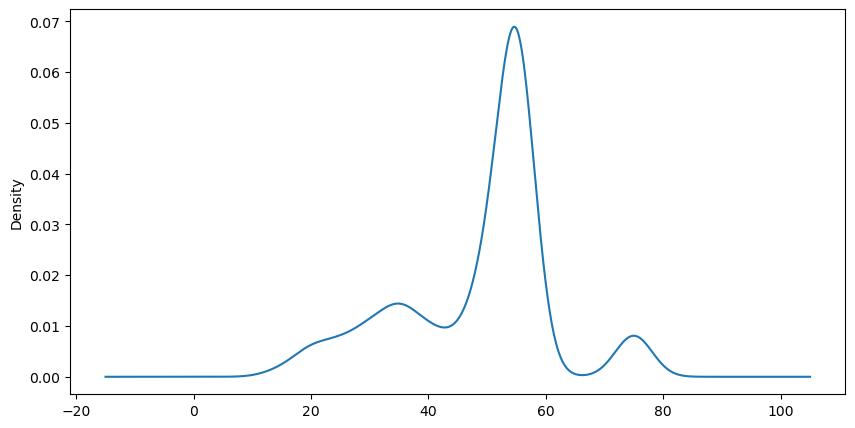

In [30]:
plt.figure(figsize=(10,5))
df_final['EF'].plot(kind='kde')

<Axes: ylabel='Density'>

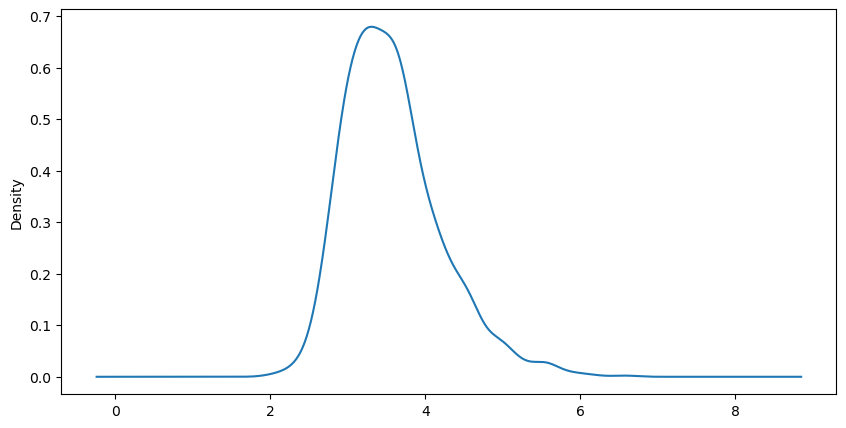

In [31]:
plt.figure(figsize=(10,5))
df_final['RBC'].plot(kind='kde')

<Axes: ylabel='Density'>

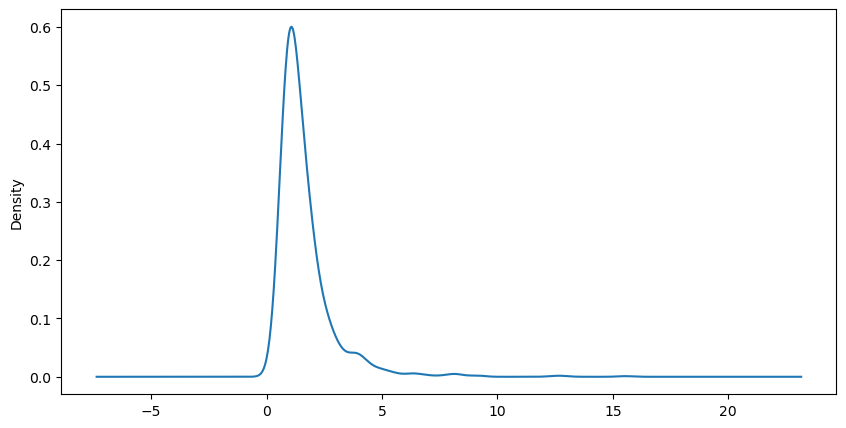

In [32]:
plt.figure(figsize=(10,5))
df_final['Creatinine'].plot(kind='kde')

<Axes: ylabel='Density'>

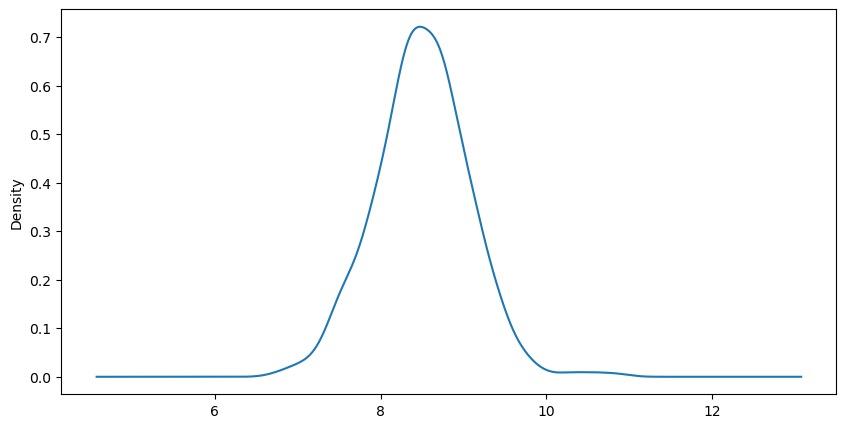

In [33]:
plt.figure(figsize=(10,5))
df_final['Blood calcium'].plot(kind='kde')

In [34]:
df_final.head()

group      ID  age  gendera        BMI  hypertensive  atrialfibrillation  \
0      1  125047   72        1  37.588179             0                   0   
1      1  139812   75        2  30.188278             0                   0   
2      1  109787   83        2  26.572634             0                   0   
3      1  130587   43        2  83.264629             0                   0   
4      1  138290   75        2  31.824842             1                   0   

   CHD with no MI  diabetes  deficiencyanemias  ...  Blood calcium  \
0               0         1                  1  ...       7.463636   
1               0         0                  1  ...       8.162500   
2               0         0                  1  ...       8.266667   
3               0         0                  0  ...       9.476923   
4               0         0                  1  ...       8.733333   

     Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  Lactic acid  \
0  109.166667  13.166667       2.618182  7.230    21.166667          0.5   
1   98.444444  11.444444       1.887500  7.225    33.444444          0.5   
2  105.857143  10.000000       2.157143  7.268    30.571429          0.5   
3   92.071429  12.357143       1.942857  7.370    38.571429          0.6   
4  104.500000  15.166667       1.650000  7.250    22.000000          0.6   

   PCO2  EF  outcome  
0  40.0  55        0  
1  78.0  55        0  
2  71.5  35        0  
3  75.0  55        0  
4  50.0  55        0  

[5 rows x 51 columns]

In [35]:
x = df_final.drop(columns='outcome')
y = df_final[['outcome']]

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [38]:
final_x = pd.DataFrame(scaled, columns=x.columns)

In [39]:
final_x.head()

group        ID       age   gendera           BMI  hypertensive  \
0 -0.653197 -0.886597 -0.153051 -1.051449  8.781267e-01     -1.595362   
1 -0.653197 -0.377851  0.070357  0.951068  8.431822e-16     -1.595362   
2 -0.653197 -1.412399  0.666111  0.951068 -4.290589e-01     -1.595362   
3 -0.653197 -0.695710 -2.312661  0.951068  6.298430e+00     -1.595362   
4 -0.653197 -0.430293  0.070357  0.951068  1.942067e-01      0.626817   

   atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  ...  \
0           -0.906632       -0.306376  1.171744           1.396379  ...   
1           -0.906632       -0.306376 -0.853429           1.396379  ...   
2           -0.906632       -0.306376 -0.853429           1.396379  ...   
3           -0.906632       -0.306376 -0.853429          -0.716138  ...   
4           -0.906632       -0.306376 -0.853429           1.396379  ...   

   Blood sodium  Blood calcium  Chloride  Anion gap  Magnesium ion        PH  \
0     -0.033742      -1.814098  1.289532  -0.286026       1.980755 -2.545867   
1     -0.000272      -0.591830 -0.719329  -0.935527      -0.925400 -2.631567   
2      0.439627      -0.409649  0.669477  -1.480271       0.147056 -1.894540   
3     -0.093989       1.707012 -1.913344  -0.591321      -0.705227 -0.146241   
4     -0.535801       0.406521  0.415209   0.468234      -1.870013 -2.203063   

   Bicarbonate  Lactic acid      PCO2        EF  
0    -1.112245    -1.533672 -0.503052  0.488583  
1     1.264720    -1.533672  2.950362  0.488583  
2     0.708507    -1.533672  2.359646 -1.066269  
3     2.257299    -1.420354  2.677724  0.488583  
4    -0.950913    -1.420354  0.405741  0.488583  

[5 rows x 50 columns]

In [40]:
y.head()

outcome
0        0
1        0
2        0
3        0
4        0

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size=0.3, random_state=42)

In [42]:
print(x_train.shape,    y_train.shape)

(823, 50) (823, 1)


In [43]:
x_train.drop(columns = 'ID', inplace=True)
x_test.drop(columns='ID', inplace=True)

In [44]:
x_train.head()

group       age   gendera           BMI  hypertensive  \
534 -0.653197  1.634212  0.951068 -8.744345e-01      0.626817   
543 -0.653197  0.963988  0.951068 -7.269298e-01     -1.595362   
989  1.530931 -1.046683  0.951068  8.431822e-16      0.626817   
996  1.530931  0.815050 -1.051449 -1.204072e+00      0.626817   
997  1.530931 -0.525398  0.951068  8.431822e-16      0.626817   

     atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
534           -0.906632       -0.306376 -0.853429          -0.716138   
543            1.102983       -0.306376 -0.853429          -0.716138   
989            1.102983       -0.306376 -0.853429          -0.716138   
996            1.102983       -0.306376 -0.853429          -0.716138   
997           -0.906632       -0.306376  1.171744          -0.716138   

     depression  ...  Blood sodium  Blood calcium  Chloride  Anion gap  \
534    2.721607  ...      0.604876       1.222691  0.321532   0.028249   
543   -0.367430  ...     -0.069891      -2.018670  1.020990   0.455663   
989   -0.367430  ...     -0.174319       0.068394 -1.239759  -0.003178   
996   -0.367430  ...      0.809716      -0.621641  0.446435  -0.657442   
997   -0.367430  ...      1.209537       0.950635  0.781403   0.062534   

     Magnesium ion        PH  Bicarbonate  Lactic acid          PCO2        EF  
534      -0.955230  0.000000     0.094522     0.543821 -6.457362e-16  0.488583  
543       0.635698 -0.089107    -1.273578     0.595084 -7.432327e-01  2.043434  
989      -1.020313  2.596188     1.049610    -0.022768 -5.939310e-01  0.488583  
996      -0.842539  1.224973     0.316281     0.052777 -7.756896e-01  0.099870  
997      -1.008261  0.000000     0.105082     0.052777 -6.457362e-16  0.488583  

[5 rows x 49 columns]

In [45]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [46]:
xgb = XGBClassifier(random_state=42)

In [47]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
pred = xgb.predict(x_test)

In [49]:
pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [52]:
cf = confusion_matrix(y_test, pred)
cf

array([[292,   4],
       [ 48,  10]], dtype=int64)

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       296
           1       0.71      0.17      0.28        58

    accuracy                           0.85       354
   macro avg       0.79      0.58      0.60       354
weighted avg       0.84      0.85      0.81       354



In [54]:
combine = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [56]:
combine_result = pd.DataFrame(combine,  columns=['y_test', 'y_pred'])
combine_result

y_test  y_pred
0         0       0
1         0       0
2         0       0
3         0       0
4         1       1
..      ...     ...
349       0       0
350       0       0
351       1       1
352       0       0
353       0       0

[354 rows x 2 columns]

In [62]:
df = pd.read_csv('mortality.csv')

In [63]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [64]:
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [ ]:
model  = setup(data = df, target = 'outcome', session_id=123, normalize=True, transformation=True, fix_imbalance=True)